## Comparação de Euler e Euler Regressivo
### Exemplo

Nesta notebook vamos aplicar o método de Euler e Euler regressivo ao PVI: $y'= -100 y,\quad y(0)=1.$

Vamos comparar o desempenho desses métodos na aproximação de sua solução $\varphi(x) = e^{-100 x}$ sobre o intervalo $[0,0.2]$.


In [3]:
#NumPy é a principal biblioteca para cálculos científicos de Python. Ela disponibiliza o objeto multidimensional 
#arranjo, objetos derivados, e um conjuntos de rotinas para operações rápidas sobre arranjos.
import numpy as np
#SymPy é uma biblioteca para cálculos simbólicos como integração exata, derivação, 
#resolução de equações, expansão em série de Taylor, etc
import sympy as sp 
#pandas é uma ferramenta de código aberto construída sobre Python para análise e manipulação de dados 
import pandas as pd
#Para mostrar tabelas mais bonitas
from IPython.display import HTML
#Matplotlib é uma biblioteca abrangente para criar visualizações estáticas, animadas e interativas em Python
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Implementação dos métodos

Precisaremos definir no Python a função no termo direito da equação e a solução exata do PVI.

In [2]:
def phi_1(a):# solução exata da equação
    return np.exp(-100*a)  

Vamos introduzir no Python algumas constantes necessárias.

In [3]:
# Condições iniciais
x0 = 0
y0 = 1
X = 0.2 #Extremo direito do intervalo

A seguir, vamos criar, para cada método, uma função que executa o passo do método. Cada função recebe x, y, h como entradas e retorna o próximo valor aproximado da solução.

É interessante implementar apenas o passo porque se formos usar um outro método de passo único poderemos aproveitar o resto do código.

In [4]:
#Passo do Método de Euler
def passo_Euler(x, y, h):
    """
    Executa uma iteração do método de Euler 
    aplicado à equação $y'= -100 y.
    
    Parâmetros
    ----------
    x : float
        ponto anterior da malha
    y : float.        
        Aproximação da solução no ponto anterior
    h : float
        Passo.
    
    Retorna
    -------
    y_novo : float
             Aproximação da solução no ponto atual.
    """
    y_novo = (1-100*h) * y 
    return y_novo   
#Passo do Método de Euler Regressivo
def passo_Euler_Regressivo(x, y, h):
    """
    Executa uma iteração do método de Euler Regressivo 
    aplicado à equação $y'=\frac{y+x^2-2}{x+1}.
    
    Parâmetros
    ----------
    x : float
        ponto anterior da malha
    y : float.        
        Aproximação da solução no ponto anterior
    h : float
        Passo.
    
    Retorna
    -------
    y_novo : float
             Aproximação da solução no ponto atual.
    """
    y_novo = y/(1+100*h) 
    return y_novo  

A seguir, aplicaremos o método de Euler e o método de Euler Regressivo com 6 tamanhos de passo diferentes. 

In [5]:
# Consideramos 7 tamanhos de passo possíveis
lista_h = [0.1,0.05,0.02,0.01,0.001,0.0001,0.00001]
# Lista com as malhas
lista_x = []
# Dicionario com as soluções aproximadas para cada malha e para cada método
lista_y = {'euler': [],'euler_regressivo': []}
# Dicionario com os erros absolutos de cada malha
erros_abs = {'euler': [],'euler_regressivo': []}
#Aplicamos os três métodos
for h in lista_h:
    N = int((X-x0) / h)   # quantidade de passos
    x = np.linspace(x0, X, num=N+1)  # malha 
    y_euler = np.empty_like(x) #inicializar z
    y_euler_regressivo = np.empty_like(x) #inicializar z
    x[0] = x0 #x inicial
    y_euler[0] = y0 #y inicial
    y_euler_regressivo[0] = y0 #y inicial    
    # N iterações dos três métodos.
    for n in range(N):
        y_euler[n + 1] = passo_Euler(x[n],y_euler[n],h) #iteração do método de Euler
        y_euler_regressivo[n + 1] = passo_Euler_Regressivo(x[n],y_euler_regressivo[n],h) #iteração do método de Euler Regressivo
    lista_x.append(x) #armazenar malha 
    lista_y['euler'].append(y_euler)  # armazenar arranjo com as aproximações de euler usando essa malha
    lista_y['euler_regressivo'].append(y_euler_regressivo)  # armazenar arranjo com as aproximações de euler usando essa malha
    erros_abs['euler']. append(phi_1(x)-y_euler) # armazenar erro global das aproximações de euler usando essa malha 
    erros_abs['euler_regressivo']. append(phi_1(x)-y_euler_regressivo) # armazenar erro global das aproximações de euler usando essa malha 

## 2. Visualização dos resultados

Primeiro, para cada valor do passo e para cada método, vamos construir uma tabela com o valor de $y_N$. Estes valores devem aproximar $\varphi(0.2) \approx 2.0612 \times 10^{-9}$.


In [6]:
#Notação científica
#pd.set_option('display.float_format', '{:.4E}'.format)
pd.set_option('precision',6)
#d: Dicionário com os dados que serão tabelados
d = {}
#Valores de h que serão mostrados em formato char
lista_h_string = np.array2string(np.array(lista_h), separator=',', formatter={'float_kind':lambda x: "%.5f" % x})[1:-1].split(",")
d['_h'] = lista_h_string
#Método de Euler    
d['Euler_yN'] = np.array([lista_y['euler'][j][-1] for j in range(len(lista_h))]) # aproximação no último ponto da malha
#Método de Euler Regressivo
d['Euler Regressivo_yN'] = np.array([lista_y['euler_regressivo'][j][-1] for j in range(len(lista_h))]) # aproximação no último ponto da malhada malha
# Formação da tabela
df = pd.DataFrame(data=d) # Criar dataframe com os dados em d
df.columns = pd.MultiIndex.from_tuples([tuple(c.split('_')) for c in df.columns])#acertar cabeçalhos das colunas
df.style.set_properties(**{'text-align': 'left'}) #Alinhamento à esquerda nas colunas
HTML(df.to_html(index=False)) # Tirar a coluna de índices

,Euler,Euler Regressivo
h,yN,yN
0.10000,8.100000e+01,8.264463e-03
0.05000,2.560000e+02,7.716049e-04
0.02000,1.000000e+00,1.693509e-05
0.01000,0.000000e+00,9.536743e-07
0.00100,7.055079e-10,5.265783e-09
0.00010,1.863757e-09,2.276420e-09
0.00001,2.040631e-09,2.081855e-09


Na tabela acima observamos que os resultados usando o método de Euler foram bem distantes da solução exata e só se aproximaram para $h$ bastante pequeno. O método de Euler Regressivo teve um comportamento bem melhor. Podemos visualizar isso também ao plotarmos a solução exata junto com as soluções aproximadas.

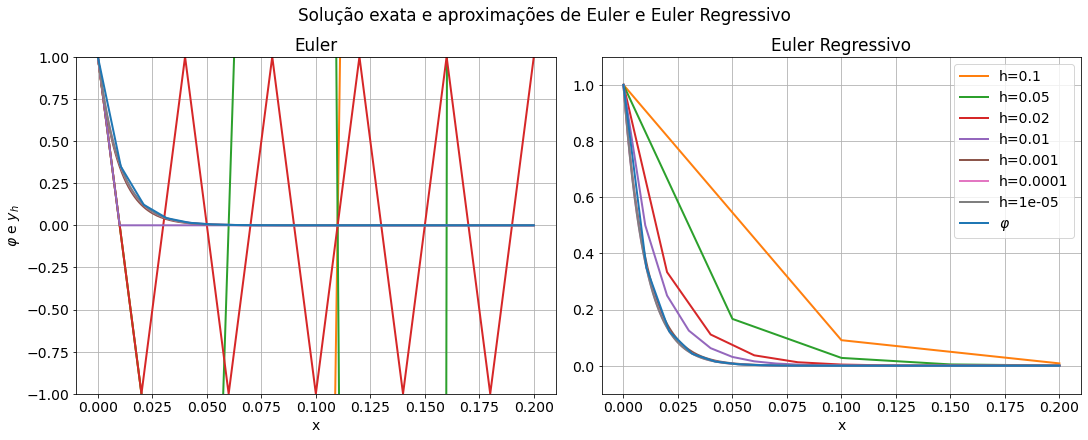

In [8]:
# Tamanho da letra nas figuras do Matplotlib.
plt.rcParams['font.size'] = 14
# Plotagem da solução exata junto com as três aproximações obtidas.
# Tamanho da figura e janelas
figsize = (15, 6)
colunas = 2
linhas = 1
# x para plotar a sol. exata
x1 = np.linspace(0, 0.2, 20)
y1 = phi_1(x1)
#figura
fig, axs = plt.subplots(linhas, colunas, figsize=figsize, constrained_layout=True)
fig.suptitle('Solução exata e aproximações de Euler e Euler Regressivo')
axs[0].set_ylabel(r'$\varphi$ e $y_h$')
axs[0].set_title('Euler')
axs[0].set_xlabel('x') 
axs[0].grid(True)
axs[0].set_ylim((-1, 1))
for j in range(len(lista_h)): 
    axs[0].plot(lista_x[j], lista_y['euler'][j], label='h='+str(lista_h[j]), \
        color = 'C'+str(j+1), linestyle='-', linewidth=2) 
axs[0].plot(x1, phi_1(x1), label=r'$\varphi$', color = 'C0', linestyle='-', linewidth=2)  
#axs[0].legend()
axs[1].set_title('Euler Regressivo')
axs[1].set_xlabel('x') 
axs[1].grid(True)
axs[1].set_ylim((-0.1, 1.1))
for j in range(len(lista_h)): 
    axs[1].plot(lista_x[j], lista_y['euler_regressivo'][j], label='h='+str(lista_h[j]), \
        color = 'C'+str(j+1), linestyle='-', linewidth=2) 
axs[1].plot(x1, phi_1(x1), label=r'$\varphi$', color = 'C0', linestyle='-', linewidth=2) 
axs[1].legend()

De fato, as soluções geradas pelo método de Euler Regressivo têm um comportamento qualitativo mais parecido com o comportamento da solução exata. As soluções geradas pelo método de Euler apresentam oscilações bem fortes, nos três maiores valores de $h$. Depois elas se comportam bem melhor.


## 3. Conclusões 

* Nesta notebook estudamos o comportamento dos método de Euler e de Euler Regressivo para o caso particular do PVI $$\frac{dy}{dx}= -100 y, \quad y(0) = 1.$$ 

* Os resultados surpreendem um pouco porque várias aproximações do método de Euler se comportaram de forma bem diferente da solução exata. As aproximações obtidas pelo método de Euler Regressivo se comportaram bem melhor. 

* Os dois métodos são de ordem $1$. Por que tanta diferença entre eles?

## Desafios:

1. Explorar o que ocorre com outros valores negativos da constante no termo direito da equação, no lugar de $-100$.
2. Explorar o que ocorre com outros valores de $h$.
3. Comparar com os resultados do método trapezoidal e Euler modificado.